In [272]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
import matplotlib.image as mpimg
from tqdm import tqdm
import scipy.stats as st
import pandas as pd

In [146]:
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

In [159]:
im = mpimg.imread("/home/pedroc/Documentos/pedro/QEco_Training_Serrapilheira/Mimulus_guttatus.png")

In [258]:
r = 1.02
p = 0.5
r_flood = 1.35
r_non_flood = 0.69

N0 = 100

\begin{align}
    \text{Geometric mean} = \displaystyle \sqrt[T]{r_{\mathrm{f}}^{pT} r_{\mathrm{nf}}^{T(1 - p)}}
\end{align}

where $p$ is the flood probability. In order for survival to be mainstream, the geometric mean must be bigger than 1, therefore

\begin{align}
    \displaystyle r_{\mathrm{f}}^{p} r_{\mathrm{nf}}^{1 - p} > 1
\end{align}

In [148]:
geo_mean = (r_flood**(p) * r_non_flood**(1-p))

In [149]:
geo_mean

0.9651424765287248

In [150]:
t = np.arange(0, 100, 1)

In [151]:
def deterministic(x0, r):
    return x0 * r

def stochastic(x0, r_flood, r_non_flood, p):
    random = np.random.uniform(0, 1)
    if random < p:
        return x0 * r_flood
    else:
        return x0 * r_non_flood

In [263]:
population_det = [N0]
population_stoc = [N0]

for i in range(1,len(t)):
    population_det.append(deterministic(population_det[-1], r))
    population_stoc.append(stochastic(population_stoc[-1], r_flood, r_non_flood, p))

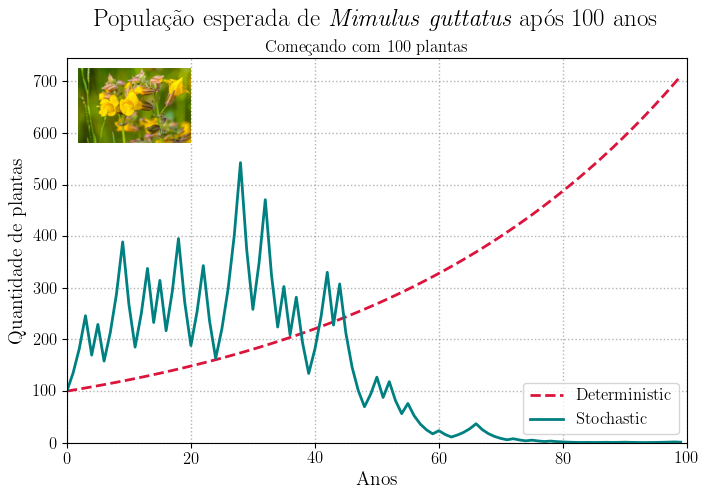

In [200]:
fig ,ax = plt.subplots(figsize=(8,5))
plt.grid(True, alpha = 0.6, color = 'grey', lw = 1, ls = 'dotted')
plt.plot(t, population_det, color = 'crimson', ls = '--', lw = 2, label = 'Deterministic')
plt.plot(t, population_stoc, color = 'teal', lw = 2, label = 'Stochastic')
plt.xlabel('Anos', fontsize = 14)
plt.ylabel('Quantidade de plantas', fontsize = 14)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.xlim(0, 100)
plt.title('População esperada de {\it{Mimulus guttatus}} após 100 anos', fontsize = 18,
          pad = 22)
fig.text(0.5, 0.89, 'Começando com 100 plantas', fontsize = 12, ha = 'center')
plt.legend(loc='lower right', fontsize = 12)
plt.ylim(0,)

newax = fig.add_axes([0.13,0.71,0.15,0.15], anchor='NE', zorder=1)
newax.imshow(im)
newax.axis('off')

plt.savefig('Plots/Mimulus_guttatus_deterministic_&_stochastic_model_4.png',
            dpi = 300, bbox_inches = 'tight')
plt.show()

In [259]:
runs_populations = []

for i in tqdm(range(200000)):
    population_stoc = [N0]
    for j in range(1,len(t)):
        population_stoc.append(stochastic(population_stoc[-1], r_flood, r_non_flood, p))
    runs_populations.append(population_stoc)
    
runs_populations = np.array(runs_populations)

100%|██████████| 200000/200000 [00:56<00:00, 3555.01it/s]


In [260]:
len(np.where(runs_populations[:,-1] < N0)[0])/len(runs_populations[:,-1])

0.843275

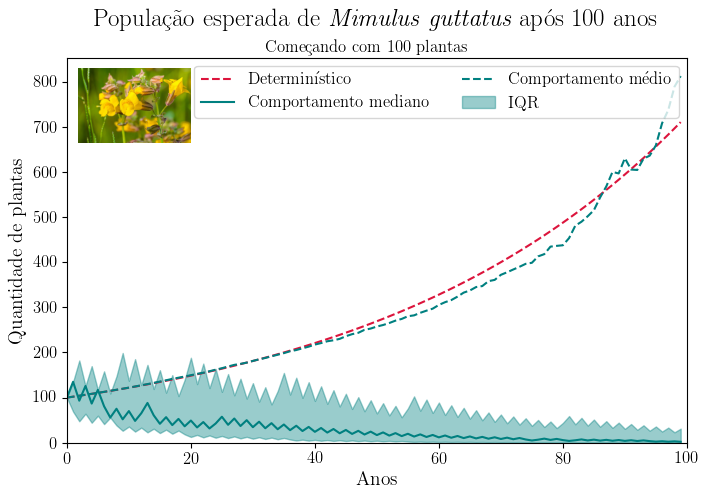

In [266]:
fig ,ax = plt.subplots(figsize=(8,5))
plt.plot(t, population_det, color = 'crimson', ls = '--', label = 'Determinístico')
plt.plot(t, np.median(runs_populations, axis = 0), color = 'teal', label = 'Comportamento mediano')
plt.plot(t, np.mean(runs_populations, axis = 0), color = 'teal', ls = '--',
        label = 'Comportamento médio')
plt.fill_between(t, np.percentile(runs_populations, 25, axis = 0),
                 np.percentile(runs_populations, 75, axis = 0),
                color = 'teal', alpha = 0.4, label = 'IQR')
# plt.fill_between(t, np.percentile(runs_populations, 5, axis = 0),
#                  np.percentile(runs_populations, 95, axis = 0),
#                 color = 'teal', alpha = 0.2)
plt.xlabel('Anos', fontsize = 14)
plt.ylabel('Quantidade de plantas', fontsize = 14)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.xlim(0, 100)
plt.title('População esperada de {\it{Mimulus guttatus}} após 100 anos', fontsize = 18,
          pad = 22)
fig.text(0.5, 0.89, 'Começando com 100 plantas', fontsize = 12, ha = 'center')
plt.legend(loc='upper right', fontsize = 12, ncol = 2)
plt.ylim(0,)

newax = fig.add_axes([0.13,0.71,0.15,0.15], anchor='NE', zorder=1)
newax.imshow(im)
newax.axis('off')

plt.savefig('Plots/Mimulus_guttatus_deterministic_&_stochastic_model_200thousand_runs.png',
            dpi = 300, bbox_inches = 'tight')
plt.show()

/home/pedroc/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:1689: FutureWarning: The `vertical` parameter is deprecated and will be removed in a future version. Assign the data to the `y` variable instead.
  warnings.warn(msg, FutureWarning)


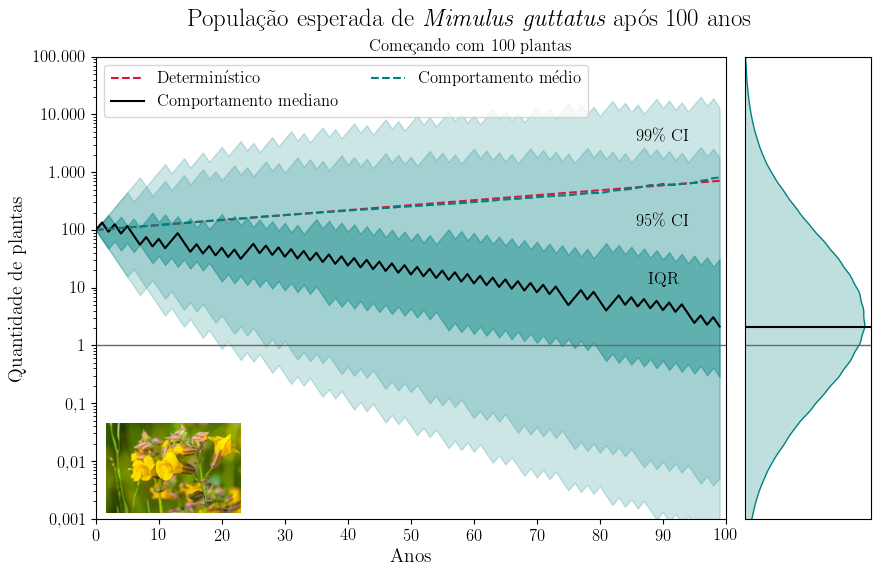

In [265]:
fig, ax = plt.subplots(1, 2, figsize = (10,6), gridspec_kw={"width_ratios": [5, 1], "wspace": 0.05})
ax[0].plot(t, population_det, color = 'crimson', ls = '--', label = 'Determinístico')
ax[0].plot(t, np.median(runs_populations, axis = 0), color = 'black', label = 'Comportamento mediano')
ax[0].plot(t, np.mean(runs_populations, axis = 0), color = 'teal', ls = '--',
          label = 'Comportamento médio')
ax[0].fill_between(t, np.percentile(runs_populations, 25, axis = 0),
                 np.percentile(runs_populations, 75, axis = 0),
                color = 'teal', alpha = 0.4)
ax[0].fill_between(t, np.percentile(runs_populations, 2.5, axis = 0),
                 np.percentile(runs_populations, 97.5, axis = 0),
                color = 'teal', alpha = 0.2)
ax[0].fill_between(t, np.percentile(runs_populations, 0.5, axis = 0),
                 np.percentile(runs_populations, 99.5, axis = 0),
                color = 'teal', alpha = 0.2)
ax[0].text(90, 12, 'IQR', fontsize = 12, ha = 'center')
ax[0].text(90, 120, '95\% CI', fontsize = 12, ha = 'center')
ax[0].text(90, 3500, '99\% CI', fontsize = 12, ha = 'center')
ax[0].set_yscale('log')
ax[0].set_ylim(1e-3, 1e5)
ax[0].set_yticks([1e-3,1e-2,1e-1,1e0,1e1,1e2,1e3,1e4,1e5])
ax[0].set_yticklabels(['0,001','0,01','0,1','1','10','100','1.000','10.000','100.000'], fontsize = 12)
ax[0].set_xlabel('Anos', fontsize = 14)
ax[0].set_ylabel('Quantidade de plantas', fontsize = 14)
ax[0].set_xticks([10*i for i in range(11)])
ax[0].set_xticklabels([10*i for i in range(11)], fontsize = 12)
ax[0].set_xlim(0, 100)
ax[0].legend(loc='upper left', fontsize = 12, ncol = 2)
ax[0].axhline(1, lw = 1, color = 'dimgrey')

sns.kdeplot(np.log10(runs_populations[:,-1]), vertical = True, ax = ax[1],
           bw_adjust = 1.3, fill = True, color = 'teal')
ax[1].set_ylim(np.log10(1e-3), np.log10(1e5))
ax[1].get_yaxis().set_visible(False)
ax[1].set_xlabel('')
ax[1].get_xaxis().set_visible(False)
ax[1].axhline(0, lw = 1, color = 'dimgrey')
ax[1].axhline(np.log10(np.median(runs_populations, axis = 0)[-1]), color = 'black')

fig.text(0.5, 0.93, 'População esperada de {\it{Mimulus guttatus}} após 100 anos', fontsize = 18,
        ha = 'center')
fig.text(0.5, 0.89, 'Começando com 100 plantas', fontsize = 12, ha = 'center')

newax = fig.add_axes([0.12,0.12,0.15,0.15], anchor='NE', zorder=1)
newax.imshow(im)
newax.axis('off')

plt.savefig('Plots/Mimulus_guttatus_deterministic_&_stochastic_model_200thousand_runs_log.png',
            dpi = 300, bbox_inches = 'tight')
plt.show()

In [245]:
extinction_prob_N0_fixed_r = []
extinction_prob_1 = []
extinction_prob_01 = []
extinction_prob_det = []

for i in tqdm(range(201)):
    p = 0.005*i
    r_flood = 1.35
    r_non_flood = 0.69
    r = (p*r_flood + (1-p)*r_non_flood)
    runs_populations = []
    runs_populations_det = []
    for j in range(5000):
        population_stoc = [N0]
        population_det = [N0]
        for k in range(1,len(t)):
            population_det.append(deterministic(population_det[-1], r))
            population_stoc.append(stochastic(population_stoc[-1], r_flood, r_non_flood, p))
        runs_populations.append(population_stoc)
        runs_populations_det.append(population_det)

    runs_populations = np.array(runs_populations)
    runs_populations_det = np.array(runs_populations_det)
    
    extinction_prob_N0_fixed_r.append(len(np.where(runs_populations[:,-1] < N0)[0])/len(runs_populations[:,-1]))
    extinction_prob_1.append(len(np.where(runs_populations[:,-1] < 1)[0])/len(runs_populations[:,-1]))
    extinction_prob_01.append(len(np.where(runs_populations[:,-1] < 0.1)[0])/len(runs_populations[:,-1]))
    extinction_prob_det.append(len(np.where(runs_populations_det[:,-1] < N0)[0])/len(runs_populations_det[:,-1]))

100%|██████████| 201/201 [05:21<00:00,  1.60s/it]


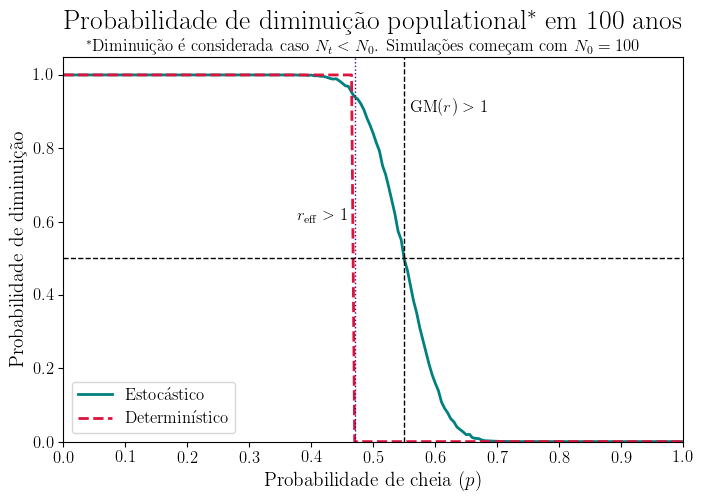

In [271]:
fig, ax = plt.subplots(figsize=(8,5))
# plt.plot([0.01*i for i in range(101)], extinction_prob_1, lw = 2,
#         color = 'crimson')
plt.plot([0.005*i for i in range(201)], extinction_prob_N0_fixed_r, lw = 2,
        color = 'teal', label = 'Estocástico')
plt.plot([0.005*i for i in range(201)], extinction_prob_det, lw = 2,
        color = 'crimson', label = 'Determinístico', ls = '--')
plt.axvline(0.47, lw = 1, ls = 'dotted', color = 'indigo')
plt.axvline(0.55, lw = 1, ls = '--', color = 'black')
plt.axhline(0.5, lw = 1, ls = '--', color = 'black')
plt.ylim(0, 1.05)
plt.xlim(0, 1)
plt.xlabel('Probabilidade de cheia ($p$)', fontsize = 14)
plt.ylabel('Probabilidade de diminuição', fontsize = 14)
plt.title('Probabilidade de diminuição populational$^*$ em 100 anos', pad = 20, fontsize = 20)
fig.text(0.5, 0.89, '$^*$Diminuição é considerada caso $N_t < N_0$. Simulações começam com $N_0 = 100$',
         ha = 'center', fontsize = 12)
plt.text(0.46, 0.6, r'$r_{\mathrm{eff}} > 1$', ha = 'right', fontsize = 12)
plt.text(0.56, 0.9, r'$\mathrm{GM}(r) > 1$', ha = 'left', fontsize = 12)
plt.xticks([0.1*i for i in range(11)], fontsize = 12)
plt.yticks(fontsize = 12)
plt.legend(loc = 'lower left', fontsize = 12)
plt.savefig('Plots/Mimulus_guttatus_population_decrease_probability.png',
            dpi = 300, bbox_inches = 'tight')
plt.show()

---

In [360]:
r = 1.02
p = 0.5
r_flood = 1.35
r_flood_std = 0.6
r_non_flood = 0.69
r_non_flood_std = 0.2

N0 = 100

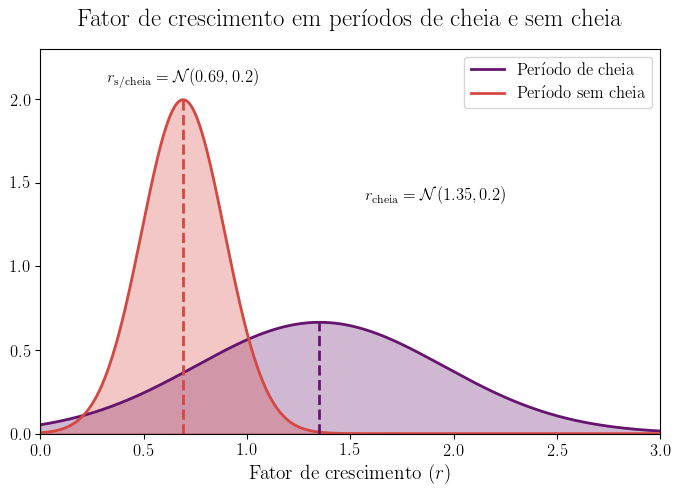

In [361]:
x = np.linspace(0, 3, 1000)
fig, ax = plt.subplots(figsize=(8,5))
plt.plot(x, st.norm.pdf(x, r_flood, r_flood_std), color = sns.color_palette('inferno')[1],
        lw = 2, label = 'Período de cheia')
plt.fill_between(x, 0, st.norm.pdf(x, r_flood, r_flood_std), color = sns.color_palette('inferno')[1],
                 alpha = 0.3)
plt.plot(x, st.norm.pdf(x, r_non_flood, r_non_flood_std),
        color = sns.color_palette('inferno')[3], lw = 2,
        label = 'Período sem cheia')
plt.fill_between(x, 0, st.norm.pdf(x, r_non_flood, r_non_flood_std),
                 color = sns.color_palette('inferno')[3],
                 alpha = 0.3)
plt.vlines(1.35, 0, st.norm.pdf(1.35, r_flood, r_flood_std), lw = 2, ls = '--',
          color = sns.color_palette('inferno')[1])
plt.vlines(0.69, 0, st.norm.pdf(0.69, r_non_flood, r_non_flood_std), lw = 2, ls = '--',
          color = sns.color_palette('inferno')[3])
plt.xlim(0, 3)
plt.ylim(0, 2.3)
plt.xlabel('Fator de crescimento ($r$)', fontsize = 14)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.text(1.57, 1.4, r'$r_{\mathrm{cheia}} = \mathcal{N}(1.35, 0.2)$', fontsize = 12)
plt.text(0.69, 2.1, r'$r_{\mathrm{s/cheia}} = \mathcal{N}(0.69, 0.2)$', fontsize = 12,
        ha = 'center')
plt.legend(loc = 'upper right', fontsize = 12)
plt.title('Fator de crescimento em períodos de cheia e sem cheia', fontsize = 18, pad = 16)
# plt.savefig('Plots/Growth_factor_flood_&_non_flood.png', dpi = 300, bbox_inches = 'tight')
plt.show()

In [350]:
t = np.arange(0, 100, 1)

In [351]:
def deterministic(x0, r):
    return x0 * r

def stochastic(x0, r_flood, r_non_flood, p):
    random = np.random.uniform(0, 1)
    if random < p:
        eff_r = np.random.normal(r_flood, r_flood_std)
        return x0 * eff_r
    else:
        eff_r = np.random.normal(r_non_flood, r_non_flood_std)
        return x0 * eff_r

In [352]:
population_det = [N0]

for i in range(1,len(t)):
    population_det.append(deterministic(population_det[-1], r))

In [321]:
runs_populations = []

for i in tqdm(range(200000)):
    population_stoc = [N0]
    for j in range(1,len(t)):
        if population_stoc[-1] <= 0:
            population_stoc.append(0)
        else:
            population_stoc.append(stochastic(population_stoc[-1], r_flood, r_non_flood, p))
    runs_populations.append(population_stoc)
    
runs_populations = np.array(runs_populations)

100%|██████████| 200000/200000 [01:48<00:00, 1838.07it/s]


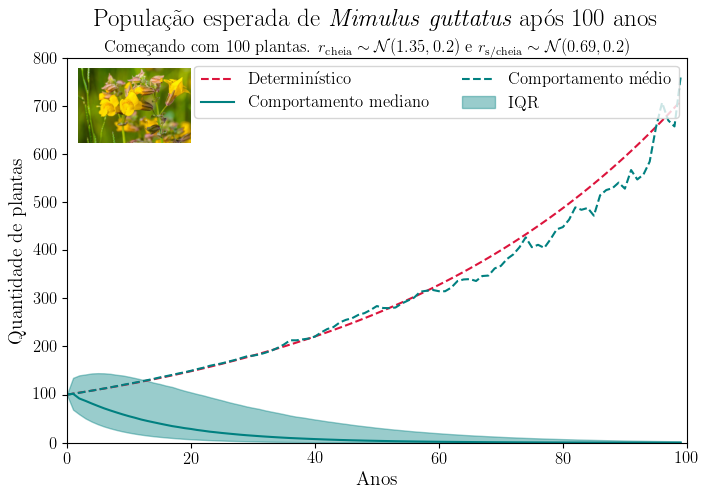

In [330]:
fig ,ax = plt.subplots(figsize=(8,5))
plt.plot(t, population_det, color = 'crimson', ls = '--', label = 'Determinístico')
plt.plot(t, np.median(runs_populations, axis = 0), color = 'teal', label = 'Comportamento mediano')
plt.plot(t, np.mean(runs_populations, axis = 0), color = 'teal', ls = '--',
        label = 'Comportamento médio')
plt.fill_between(t, np.percentile(runs_populations, 25, axis = 0),
                 np.percentile(runs_populations, 75, axis = 0),
                color = 'teal', alpha = 0.4, label = 'IQR')
# plt.fill_between(t, np.percentile(runs_populations, 5, axis = 0),
#                  np.percentile(runs_populations, 95, axis = 0),
#                 color = 'teal', alpha = 0.2)
plt.xlabel('Anos', fontsize = 14)
plt.ylabel('Quantidade de plantas', fontsize = 14)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.xlim(0, 100)
plt.title('População esperada de {\it{Mimulus guttatus}} após 100 anos', fontsize = 18,
          pad = 22)
fig.text(0.5, 0.89, 'Começando com 100 plantas. $r_{\mathrm{cheia}} \sim \mathcal{N}(1.35, 0.2)$ e $r_{\mathrm{s/cheia}} \sim \mathcal{N}(0.69, 0.2)$',
         fontsize = 12, ha = 'center')
plt.legend(loc='upper right', fontsize = 12, ncol = 2)
plt.ylim(0,800)

newax = fig.add_axes([0.13,0.71,0.15,0.15], anchor='NE', zorder=1)
newax.imshow(im)
newax.axis('off')

plt.savefig('Plots/Mimulus_guttatus_deterministic_&_stochastic_distribution_model_200thousand_runs.png',
            dpi = 300, bbox_inches = 'tight')
plt.show()

/home/pedroc/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: divide by zero encountered in log10
/home/pedroc/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in log10
/home/pedroc/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:1689: FutureWarning: The `vertical` parameter is deprecated and will be removed in a future version. Assign the data to the `y` variable instead.
  warnings.warn(msg, FutureWarning)


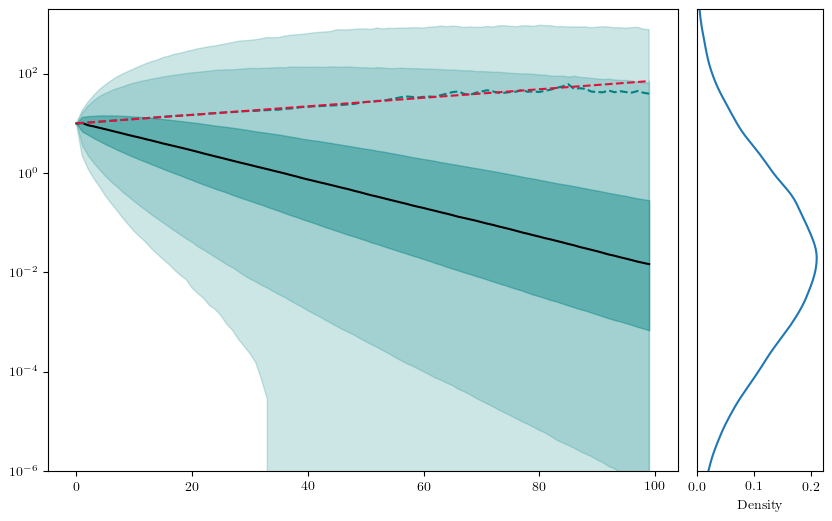

In [18]:
fig, ax = plt.subplots(1, 2, figsize = (10,6), gridspec_kw={"width_ratios": [5, 1], "wspace": 0.05})
ax[0].plot(t, np.median(runs_populations, axis = 0), color = 'black')
ax[0].plot(t, np.mean(runs_populations, axis = 0), color = 'teal', ls = '--')
ax[0].fill_between(t, np.percentile(runs_populations, 25, axis = 0),
                 np.percentile(runs_populations, 75, axis = 0),
                color = 'teal', alpha = 0.4)
# ax[0].fill_between(t, np.percentile(runs_populations, 5, axis = 0),
#                  np.percentile(runs_populations, 95, axis = 0),
#                 color = 'teal', alpha = 0.3)
ax[0].fill_between(t, np.percentile(runs_populations, 2.5, axis = 0),
                 np.percentile(runs_populations, 97.5, axis = 0),
                color = 'teal', alpha = 0.2)
ax[0].fill_between(t, np.percentile(runs_populations, 0.5, axis = 0),
                 np.percentile(runs_populations, 99.5, axis = 0),
                color = 'teal', alpha = 0.2)
ax[0].plot(t, population_det, color = 'crimson', ls = '--')
ax[0].set_yscale('log')
ax[0].set_ylim(1e-6, 2e3)

sns.kdeplot(np.log10(runs_populations[:,-1]), vertical = True, ax = ax[1],
           bw_adjust = 1.1)
ax[1].set_ylim(np.log10(1e-6), np.log10(2e3))
ax[1].get_yaxis().set_visible(False)

plt.show()

In [362]:
extinction_prob_N0 = []
extinction_prob_1 = []
extinction_prob_01 = []

for i in tqdm(range(101)):
    p = 0.01*i
    runs_populations = []
    for j in range(10000):
        population_stoc = [N0]
        for k in range(1,len(t)):
            population_stoc.append(stochastic(population_stoc[-1], r_flood, r_non_flood, p))
        runs_populations.append(population_stoc)

    runs_populations = np.array(runs_populations)
    extinction_prob_N0.append(len(np.where(runs_populations[:,-1] < N0)[0])/len(runs_populations[:,-1]))
    extinction_prob_1.append(len(np.where(runs_populations[:,-1] < 1)[0])/len(runs_populations[:,-1]))
    extinction_prob_01.append(len(np.where(runs_populations[:,-1] < 0.1)[0])/len(runs_populations[:,-1]))

100%|██████████| 101/101 [09:38<00:00,  5.72s/it]


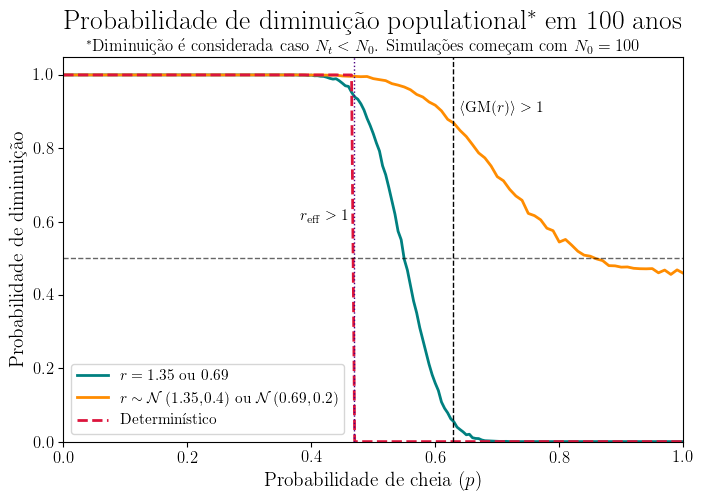

In [363]:
fig, ax = plt.subplots(figsize=(8,5))
plt.plot([0.005*i for i in range(201)], extinction_prob_N0_fixed_r, lw = 2,
        color = 'teal', label = r'$r = 1.35$ ou $0.69$')
plt.plot([0.01*i for i in range(101)], extinction_prob_N0, lw = 2, color = 'darkorange',
         label = r'$r \sim \mathcal{N}\left(1.35, 0.4 \right)$ ou $\mathcal{N}\left(0.69, 0.2 \right)$')
plt.plot([0.005*i for i in range(201)], extinction_prob_det, lw = 2,
        color = 'crimson', label = r'Determinístico', ls = '--')
plt.axvline(0.469, lw = 1, ls = 'dotted', color = 'indigo')
# plt.axvline(0.55, lw = 1, ls = 'dotted', color = 'indigo')
plt.axvline(0.628, lw = 1, ls = '--', color = 'black')
plt.axhline(0.5, lw = 1, ls = '--', color = 'black', alpha = 0.6)
plt.ylim(0, 1.05)
plt.xlim(0, 1)
plt.xlabel('Probabilidade de cheia $(p)$', fontsize = 14)
plt.ylabel('Probabilidade de diminuição', fontsize = 14)
plt.title('Probabilidade de diminuição populational$^*$ em 100 anos', pad = 20, fontsize = 20)
fig.text(0.5, 0.89, '$^*$Diminuição é considerada caso $N_t < N_0$. Simulações começam com $N_0 = 100$',
         ha = 'center', fontsize = 12)
plt.legend(loc = 'lower left', fontsize = 11)
plt.text(0.46, 0.6, '$r_{\mathrm{eff}} > 1$', ha = 'right', fontsize = 11)
# plt.text(0.56, 0.9, '$\mathrm{GM}(r) > 1$', ha = 'left', fontsize = 11)
plt.text(0.64, 0.9, r'$\left \langle \mathrm{GM}(r) \right \rangle > 1$', ha = 'left', fontsize = 11)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
# plt.savefig('Plots/Mimulus_guttatus_population_decrease_probability_full_even_larger_sigma.png',
#             dpi = 300, bbox_inches = 'tight')
plt.show()

In [93]:
def deterministic(x0, r):
    return x0 * r

def stochastic(x0, r_flood, r_flood_std, r_non_flood, r_non_flood_std, p):
    random = np.random.uniform(0, 1)
    if random < p:
        eff_r = np.random.normal(r_flood, r_flood_std)
        return x0 * eff_r
    else:
        eff_r = np.random.normal(r_non_flood, r_non_flood_std)
        return x0 * eff_r

100%|██████████| 101/101 [08:40<00:00,  5.16s/it]


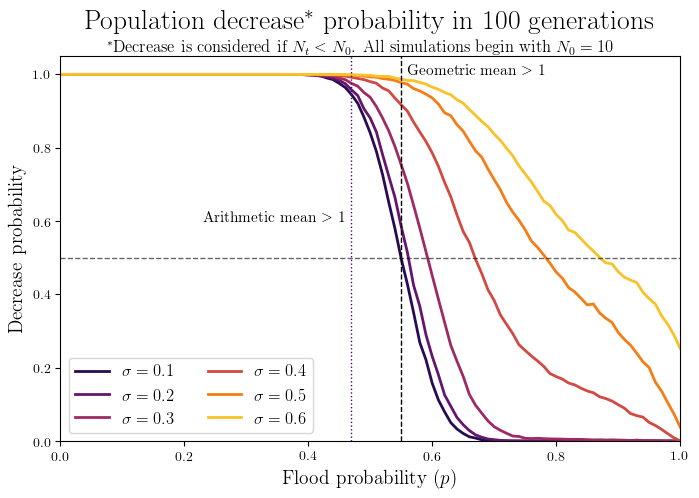

In [143]:
fig, ax = plt.subplots(figsize=(8,5))
decrease_probs = []

for l in range(6):

    extinction_prob_N0_std = []

    for i in tqdm(range(101)):
        p = 0.01*i
        r_flood = 1.35
        r_flood_std = 0.1*l
        r_non_flood = 0.69
        r_non_flood_std = 0.1*l
        runs_populations = []
        for j in range(10000):
            population_stoc = [N0]
            for k in range(1,len(t)):
                population_stoc.append(stochastic(population_stoc[-1], r_flood, r_flood_std, r_non_flood,
                                                  r_non_flood_std, p))
            runs_populations.append(population_stoc)

        runs_populations = np.array(runs_populations)
        extinction_prob_N0_std.append(len(np.where(runs_populations[:,-1] < N0)[0])/len(runs_populations[:,-1]))
        decrease_probs.append(extinction_prob_N0_std)
        
    plt.plot([0.01*i for i in range(101)], extinction_prob_N0_std, lw = 2,
            color = sns.color_palette('inferno', 6)[l], label = fr'$\sigma = {0.1*(l+1):.1f}$')


plt.axvline(0.469, lw = 1, ls = 'dotted', color = 'indigo')
plt.axvline(0.55, lw = 1, ls = '--', color = 'black')
# plt.axvline(0.592, lw = 1, ls = '--', color = 'black')
plt.axhline(0.5, lw = 1, ls = '--', color = 'black', alpha = 0.6)
plt.ylim(0, 1.05)
plt.xlim(0, 1)
plt.xlabel('Flood probability $(p)$', fontsize = 14)
plt.ylabel('Decrease probability', fontsize = 14)
plt.title('Population decrease$^*$ probability in 100 generations', pad = 20, fontsize = 20)
fig.text(0.5, 0.89, '$^*$Decrease is considered if $N_t < N_0$. All simulations begin with $N_0 = 10$',
         ha = 'center', fontsize = 12)
plt.legend(loc = 'lower left', fontsize = 12, ncol = 2)
plt.text(0.46, 0.6, 'Arithmetic mean $>$ 1', ha = 'right', fontsize = 11)
plt.text(0.56, 1, 'Geometric mean $>$ 1', ha = 'left', fontsize = 11)
plt.savefig('Plots/Extinction_probability_sigma_distribution.png', dpi = 300, bbox_inches = 'tight')
plt.show()

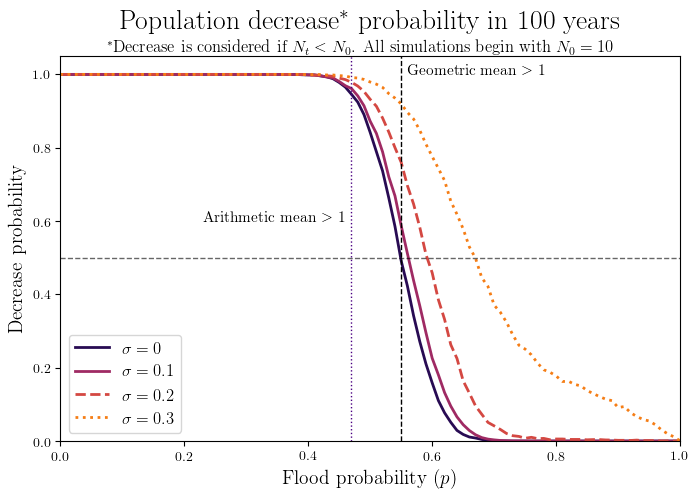

In [109]:
fig, ax = plt.subplots(figsize=(8,5))
# plt.plot([0.01*i for i in range(101)], extinction_prob_det, lw = 2,
#         color = 'darkorange', label = r'Deterministic')
plt.plot([0.01*i for i in range(101)], extinction_prob_N0_fixed_r, lw = 2,
        color = sns.color_palette('inferno')[0], label = r'$\sigma = 0$')
plt.plot([0.01*i for i in range(101)], extinction_prob_N0_low_std, lw = 2,
        color = sns.color_palette('inferno')[2], label = r'$\sigma = 0.1$')
plt.plot([0.01*i for i in range(101)], extinction_prob_N0, lw = 2,
        color = sns.color_palette('inferno')[3], ls = '--', label = r'$\sigma = 0.2$')
plt.plot([0.01*i for i in range(101)], extinction_prob_N0_large_std, lw = 2,
        color = sns.color_palette('inferno')[4], ls = 'dotted', label = r'$\sigma = 0.3$')
plt.axvline(0.469, lw = 1, ls = 'dotted', color = 'indigo')
plt.axvline(0.55, lw = 1, ls = '--', color = 'black')
# plt.axvline(0.592, lw = 1, ls = '--', color = 'black')
plt.axhline(0.5, lw = 1, ls = '--', color = 'black', alpha = 0.6)
plt.ylim(0, 1.05)
plt.xlim(0, 1)
plt.xlabel('Flood probability $(p)$', fontsize = 14)
plt.ylabel('Decrease probability', fontsize = 14)
plt.title('Population decrease$^*$ probability in 100 years', pad = 20, fontsize = 20)
fig.text(0.5, 0.89, '$^*$Decrease is considered if $N_t < N_0$. All simulations begin with $N_0 = 10$',
         ha = 'center', fontsize = 12)
plt.legend(loc = 'lower left', fontsize = 12)
plt.text(0.46, 0.6, 'Arithmetic mean $>$ 1', ha = 'right', fontsize = 11)
plt.text(0.56, 1, 'Geometric mean $>$ 1', ha = 'left', fontsize = 11)
plt.show()

\begin{align}
    r_f \sim \mathcal{N}(1.35, \sigma) \\
    r_{nf} \sim \mathcal{N}(0.69, \sigma) \\
    \text{GM} \sim r_f^p r_{nf}^{1-p}
\end{align}

in order to not being extinct, we need $\left \langle \text{GM} \right \rangle > 1$!

In [135]:
r_f = np.random.normal(1.35, 0.2, 2000)
r_nf = np.random.normal(0.69, 0.2, 2000)
p = 0.55

geo_mean = (r_f**(p) * r_nf**(1-p))

In [136]:
np.mean(geo_mean)

0.9833356370770112

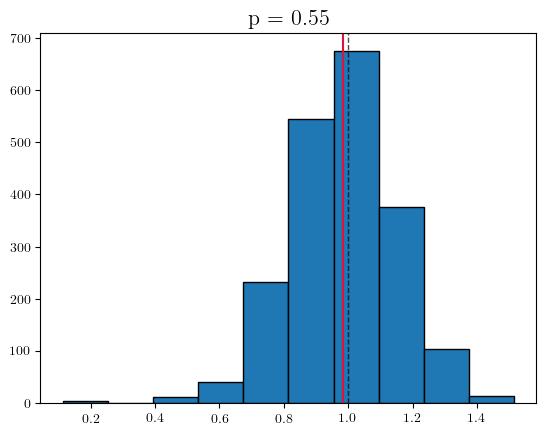

In [141]:
plt.hist(geo_mean, edgecolor = 'black')
plt.axvline(np.mean(geo_mean), color = 'crimson')
plt.axvline(1, color = 'black', lw = 1, ls = '--', alpha = 0.7)
plt.title(f'p = {p}', fontsize = 16)
plt.show()